In [359]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy
import sklearn
from sklearn.cross_decomposition import PLSRegression
from sklearn import neighbors

%matplotlib inline
sns.set_style('white')

In [360]:
## Print out the head.
NY_Crime2 = pd.read_csv('NYM2.csv')
NY_Crime2.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN


In [361]:
## Copy the 3rd column to header.
NY_Crime2.columns = NY_Crime2.iloc[3]
NY_Crime2.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN


In [362]:
## remove 3 rows that are empty.
NY_Crime2 = NY_Crime2.drop(NY_Crime2.index[:4])
NY_Crime2.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0,NaN
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,NaN
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0,NaN
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,NaN


In [363]:
## Remove the string , (comma), so later we can change it to integer.
## Drop the 3 on column, but it didnt work. 
## Reset the index to start from 0 instead of 4.
NY_Crime2 = NY_Crime2.reset_index(drop=True)
NY_Crime2.index.name = None
NY_Crime2['Population'] = NY_Crime2['Population'].str.replace(",", "")
NY_Crime2.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0,NaN
1,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0,NaN
2,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,NaN
3,Akron Village,2842,1,0,NaN,0,0,1,17,0,17,0,0,NaN
4,Albany4,98595,802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,NaN


In [364]:
## Fill out any nan to 0, and make it stay by using inplace=True.
## Remove 348 rows to end since its useless data.
NY_Crime2.fillna(0, inplace=True)
NY_Crime2.drop(NY_Crime2.index[348:], inplace=True)
NY_Crime2.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1851,0,0,0,0,0,0,11,1,10,0,0,0.0
1,Addison Town and Village,2568,2,0,0,0,1,1,49,1,47,1,0,0.0
2,Afton Village4,820,0,0,0,0,0,0,1,0,1,0,0,0.0
3,Akron Village,2842,1,0,0,0,0,1,17,0,17,0,0,0.0
4,Albany4,98595,802,8,54,0,237,503,"3,888",683,"3,083",122,12,0.0


In [365]:
## Make the Population to integer, so later we can do math calculation without error.
NY_Crime2['Population'] = NY_Crime2.Population.astype(int)

In [366]:
## Popuation 2 is Population times Population
NY_Crime2['Population2'] = (NY_Crime2['Population'])*(NY_Crime2['Population'])
NY_Crime2.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1851,0,0,0,0,0,0,11,1,10,0,0,0.0,3426201
1,Addison Town and Village,2568,2,0,0,0,1,1,49,1,47,1,0,0.0,6594624
2,Afton Village4,820,0,0,0,0,0,0,1,0,1,0,0,0.0,672400
3,Akron Village,2842,1,0,0,0,0,1,17,0,17,0,0,0.0,8076964
4,Albany4,98595,802,8,54,0,237,503,"3,888",683,"3,083",122,12,0.0,1131039433


In [367]:
NY_Crime2.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime2.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime2.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1851,0,0,0,0,0,0,11,1,10,0,0,0.0,3426201
1,Addison Town and Village,2568,2,0,0,0,1,1,49,1,47,1,0,0.0,6594624
2,Afton Village4,820,0,0,0,0,0,0,1,0,1,0,0,0.0,672400
3,Akron Village,2842,1,0,0,0,0,1,17,0,17,0,0,0.0,8076964
4,Albany4,98595,802,8,54,0,237,503,"3,888",683,"3,083",122,12,0.0,1131039433


In [368]:
NY_Crime2['Murder'] = NY_Crime2['Murder'].str.replace(",", "")
NY_Crime2['Robbery'] = NY_Crime2['Robbery'].str.replace(",", "")
NY_Crime2['Property_Crime'] = NY_Crime2['Property_Crime'].str.replace(",", "")
NY_Crime2['Property_Crime'] = NY_Crime2['Property_Crime'].astype(int)
NY_Crime2['Murder'] = NY_Crime2['Murder'].astype(int)
NY_Crime2['Robbery'] = NY_Crime2['Robbery'].astype(int)
NY_Crime2['Property_Crime'] = NY_Crime2['Property_Crime'].apply(lambda x: x if x < 3000 else 0)
NY_Crime2['Population'] = NY_Crime2['Population'].apply(lambda x: x if x <140000 else 0)

In [369]:
NY_Crime2['Murder2'] = NY_Crime2['Murder'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime2.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2
0,Adams Village,1851,0,0,0,0,0,0,11,1,10,0,0,0.0,3426201,Coded 0
1,Addison Town and Village,2568,2,0,0,0,1,1,49,1,47,1,0,0.0,6594624,Coded 0
2,Afton Village4,820,0,0,0,0,0,0,1,0,1,0,0,0.0,672400,Coded 0
3,Akron Village,2842,1,0,0,0,0,1,17,0,17,0,0,0.0,8076964,Coded 0
4,Albany4,98595,802,8,54,0,237,503,0,683,"3,083",122,12,0.0,1131039433,Coded 1


In [370]:
NY_Crime2['Robbery2'] = NY_Crime2['Robbery'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime2.head(400)

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2,Robbery2
0,Adams Village,1851,0,0,0,0,0,0,11,1,10,0,0,0.0,3426201,Coded 0,Coded 0
1,Addison Town and Village,2568,2,0,0,0,1,1,49,1,47,1,0,0.0,6594624,Coded 0,Coded 1
2,Afton Village4,820,0,0,0,0,0,0,1,0,1,0,0,0.0,672400,Coded 0,Coded 0
3,Akron Village,2842,1,0,0,0,0,1,17,0,17,0,0,0.0,8076964,Coded 0,Coded 0
4,Albany4,98595,802,8,54,0,237,503,0,683,"3,083",122,12,0.0,1131039433,Coded 1,Coded 1
5,Albion Village4,5872,26,0,3,0,2,21,204,41,159,4,0,0.0,34480384,Coded 0,Coded 1
6,Alexandria Bay Village4,1107,0,0,0,0,0,0,7,2,5,0,0,0.0,1225449,Coded 0,Coded 0
7,Alfred Village4,4032,11,1,1,0,0,9,30,6,24,0,0,0.0,16257024,Coded 1,Coded 0
8,Altamont Village4,1723,1,0,0,0,0,1,2,2,0,0,0,0.0,2968729,Coded 0,Coded 0
9,Amherst Town4,118860,128,1,16,0,43,68,2066,176,"1,846",44,2,0.0,1242797712,Coded 1,Coded 1


In [371]:
NY_Crime2 = NY_Crime2[['City', 'Population', 'Population2', 'Murder', 'Robbery', 'Property_Crime']]
NY_Crime2.head()

3,City,Population,Population2,Murder,Robbery,Property_Crime
0,Adams Village,1851,3426201,0,0,11
1,Addison Town and Village,2568,6594624,0,1,49
2,Afton Village4,820,672400,0,0,1
3,Akron Village,2842,8076964,0,0,17
4,Albany4,98595,1131039433,8,237,0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


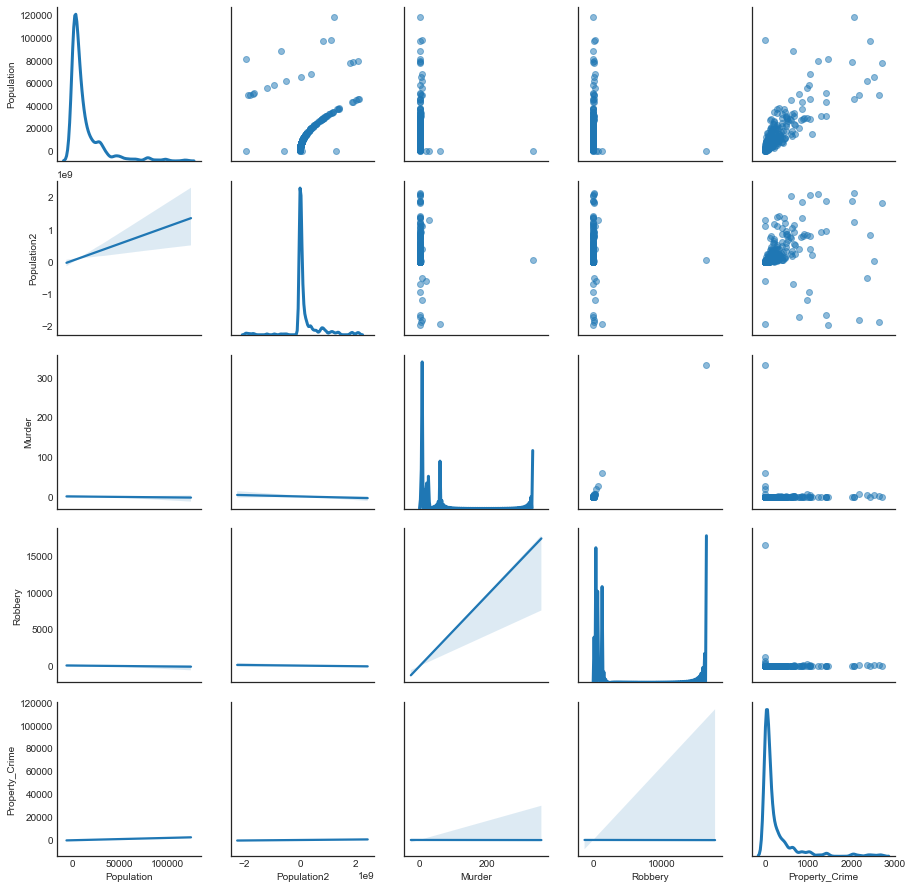

In [372]:
df_explore = NY_Crime2.loc[:, 'Population':'Property_Crime'].dropna()

# Scatterplot matrix
g = sns.PairGrid(df_explore, diag_sharey=False)

#Scatterplots
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Univariate distribtuion of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()

## My Linear Regression graph is not so high, I believe that a good thing because it tells us that Property Crime is very low.

In [373]:
df2 = NY_Crime2.loc[:,['Population','Murder', 'Robbery', 'Property_Crime']]

In [374]:
y = NY_Crime2.Property_Crime.values.reshape(-1, 1)
# What does values.reshape do?

X = NY_Crime2.loc[:,['Population','Murder', 'Robbery']]

In [375]:

# Testing for the assumption of low collinearity

correlation_matrix = df2.corr()
display(correlation_matrix)

3,Population,Murder,Robbery,Property_Crime
3,,,,
Population,1.000000,-0.021152,-0.023886,0.805578
Murder,-0.021152,1.000000,0.993160,-0.010249
Robbery,-0.023886,0.993160,1.000000,-0.013932
Property_Crime,0.805578,-0.010249,-0.013932,1.000000


## OLS model

In [376]:

# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Print results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

## Not so high R-Squared, but it is still ok to trust it. 

R-squared regression: 0.6491521227449079

Coefficients: 
 [[ 0.02042758  2.67252107 -0.05160376]]

Intercept: 
 [-17.84988646]


In [377]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Print results
print('\nCoefficients: \n', pls1.coef_)

## Coefficients chances, but R-Squared is still the same.

R-squared PLSR: 0.6480873001046843

Coefficients: 
 [[351.78776958]
 [ -4.47566564]
 [ -6.08406888]]


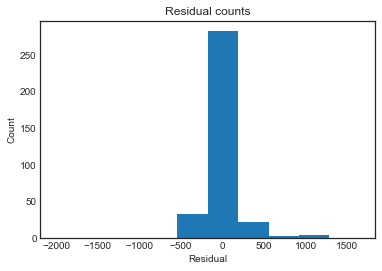

In [378]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = NY_Crime2.Property_Crime

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Nice even graph that we can trust to predict the future.

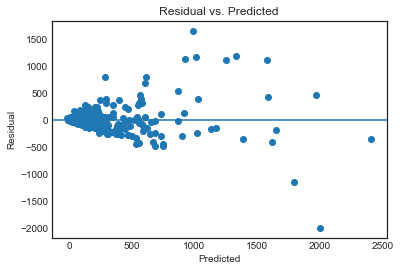

In [379]:

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Our dataset isn't scatter too much, which is good.

In [380]:
linear_formula = 'Property_Crime ~ Population+Murder+Robbery'
lm = smf.ols(formula=linear_formula, data=NY_Crime2).fit()
## calculating the params, p values, R-Squared.
## again, R-Squared is still the same as before. Our p-value is high on Murder and Robbery rate. And Robbery is low on params.

In [381]:
lm.params

Intercept    -17.849886
Population     0.020428
Murder         2.672521
Robbery       -0.051604
dtype: float64

In [382]:
lm.pvalues

Intercept     3.054161e-01
Population    3.733838e-80
Murder        6.844138e-01
Robbery       7.007783e-01
dtype: float64

In [383]:
lm.rsquared

0.6491521227449077

In [384]:
lm.conf_int()

,0,1
Intercept,-52.054936,16.355163
Population,0.018834,0.022022
Murder,-10.249416,15.594459
Robbery,-0.315517,0.212310


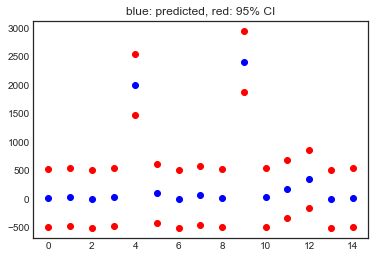

In [420]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [385]:
# Removing variables with weak p values
linear_formula2 = 'Property_Crime ~ Population + Murder'

# Fit the model
lm2 = smf.ols(formula=linear_formula2, data=NY_Crime2).fit()

In [386]:
lm2.params

Intercept    -17.372145
Population     0.020435
Murder         0.163137
dtype: float64

In [387]:
lm2.pvalues

Intercept     3.166875e-01
Population    1.990709e-80
Murder        8.314990e-01
dtype: float64

In [388]:
lm2.rsquared

0.6490012682874055

In [389]:
lm2.conf_int()

## by removing Robbery from our dataset, it look like on Confidence Interval for Population have improved by alot.
## our R-Sqaured stay the same at 64.9%.

,0,1
Intercept,-51.447313,16.703024
Population,0.018844,0.022027
Murder,-1.343702,1.669975


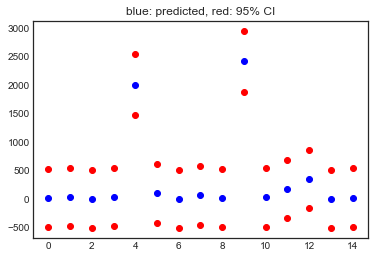

In [419]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm2.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

## Using 2013 New York Crime now:

In [390]:
NY_Crime = pd.read_csv('NYM.csv')
NY_Crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [391]:
NY_Crime.columns = NY_Crime.iloc[3]
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [392]:
NY_Crime = NY_Crime.drop(NY_Crime.index[:4])
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,NaN
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,NaN
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [393]:
NY_Crime = NY_Crime.reset_index(drop=True)
NY_Crime.index.name = None
NY_Crime['Population'] = NY_Crime['Population'].str.replace(",", "")
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,NaN
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,NaN
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,NaN
3,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [394]:
NY_Crime.fillna(0, inplace=True)
NY_Crime.drop(NY_Crime.index[348:], inplace=True)
NY_Crime.head(400)

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.0
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.0
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.0
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0,0.0
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,0.0
7,Amherst Town,118296,107,1,0,7,31,68,"2,118",204,"1,882",32,3,0.0
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1,0.0
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0,0.0


In [395]:
NY_Crime['Population'] = NY_Crime.Population.astype(int)

In [396]:
NY_Crime['Population2'] = (NY_Crime['Population'])*(NY_Crime['Population'])
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.0,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.0,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.0,8099716
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.0,1005443344
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.0,40806544


In [397]:
NY_Crime.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.0,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.0,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.0,8099716
3,Albany,97956,791,8,0,30,227,526,"4,090",705,"3,243",142,0,0.0,1005443344
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.0,40806544


In [398]:
NY_Crime['Murder'] = NY_Crime['Murder'].str.replace(",", "")
NY_Crime['Robbery'] = NY_Crime['Robbery'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].astype(int)
NY_Crime['Murder'] = NY_Crime['Murder'].astype(int)
NY_Crime['Robbery'] = NY_Crime['Robbery'].astype(int)
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].apply(lambda x: x if x < 3000 else 0)
NY_Crime['Population'] = NY_Crime['Population'].apply(lambda x: x if x <140000 else 0)

In [399]:
NY_Crime['Murder2'] = NY_Crime['Murder'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.0,3463321,Coded 0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.0,6640929,Coded 0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.0,8099716,Coded 0
3,Albany,97956,791,8,0,30,227,526,0,705,"3,243",142,0,0.0,1005443344,Coded 1
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.0,40806544,Coded 0


In [400]:
NY_Crime['Robbery2'] = NY_Crime['Robbery'].apply(lambda x: 'Coded 1' if x > 0 else 'Coded 0')
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Population2,Murder2,Robbery2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0.0,3463321,Coded 0,Coded 0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0.0,6640929,Coded 0,Coded 0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0.0,8099716,Coded 0,Coded 0
3,Albany,97956,791,8,0,30,227,526,0,705,"3,243",142,0,0.0,1005443344,Coded 1,Coded 1
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,0.0,40806544,Coded 0,Coded 1


In [401]:
NY_Crime = NY_Crime[['City', 'Population', 'Population2', 'Murder', 'Robbery', 'Property_Crime']]
NY_Crime.head()

3,City,Population,Population2,Murder,Robbery,Property_Crime
0,Adams Village,1861,3463321,0,0,12
1,Addison Town and Village,2577,6640929,0,0,24
2,Akron Village,2846,8099716,0,0,16
3,Albany,97956,1005443344,8,227,0
4,Albion Village,6388,40806544,0,4,223


In [402]:
NY_Crime.head()

3,City,Population,Population2,Murder,Robbery,Property_Crime
0,Adams Village,1861,3463321,0,0,12
1,Addison Town and Village,2577,6640929,0,0,24
2,Akron Village,2846,8099716,0,0,16
3,Albany,97956,1005443344,8,227,0
4,Albion Village,6388,40806544,0,4,223


In [403]:
regr = linear_model.LinearRegression()
y1 = NY_Crime['Property_Crime'].values.reshape(-1,1)
x1 = NY_Crime[['Population', 'Murder', 'Robbery']]

regr.fit(x1, y1)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x1, y1))


Coefficients: 
 [[ 0.02084882 -0.7772181   0.01768135]]

Intercept: 
 [6.38675143]

R-squared:
0.5996861487366745


In [404]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(x1, y1)

# Save predicted values.
Y_PLS_pred = pls1.predict(x1)
print('R-squared PLSR:', pls1.score(x1, y1))

# Print results
print('\nCoefficients: \n', pls1.coef_)

## Our R-Squared stayed the same. 

R-squared PLSR: 0.5983819732778138

Coefficients: 
 [[363.75208481]
 [ -5.94400573]
 [ -6.9750419 ]]


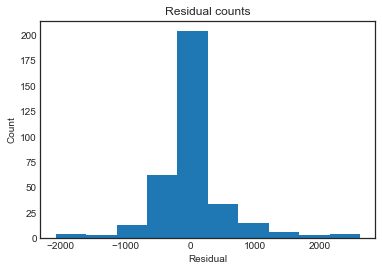

In [405]:
# Extract predicted values.
predicted1 = regr.predict(X).ravel()
actual1 = NY_Crime.Property_Crime

# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

# This looks a bit concerning.
plt.hist(residual1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Good graph, it isn't skewed.

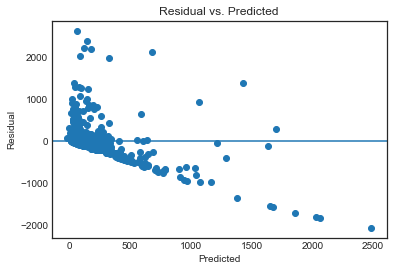

In [406]:
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Not great as the histogram, but still able to have a good guess as what to predict in the future.

In [407]:
linear_formula3 = 'Property_Crime ~ Population+Murder+Robbery'
lm3 = smf.ols(formula=linear_formula3, data=NY_Crime).fit()

In [408]:
lm3.params

Intercept     6.386751
Population    0.020849
Murder       -0.777218
Robbery       0.017681
dtype: float64

In [409]:
lm3.pvalues

Intercept     7.549844e-01
Population    2.493481e-70
Murder        9.174190e-01
Robbery       8.943078e-01
dtype: float64

In [410]:
lm3.rsquared

0.5996861487366745

In [411]:
lm3.conf_int()

,0,1
Intercept,-33.834447,46.607950
Population,0.019042,0.022656
Murder,-15.510015,13.955579
Robbery,-0.243892,0.279255


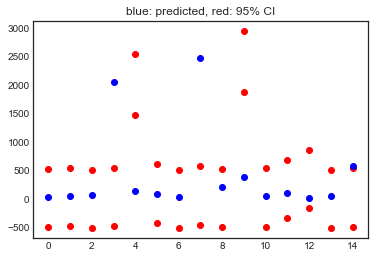

In [418]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm3.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [412]:
# Removing variables with weak p values
linear_formula4 = 'Property_Crime ~ Population+Robbery'

# Fit the model
lm4 = smf.ols(formula=linear_formula4, data=NY_Crime).fit()

In [413]:
lm4.params

Intercept     6.204360
Population    0.020846
Robbery       0.003977
dtype: float64

In [414]:
lm4.pvalues

Intercept     7.605742e-01
Population    1.499436e-70
Robbery       7.985127e-01
dtype: float64

In [415]:
lm4.rsquared

## Our R-Squared still the same.

0.5996736197746808

In [416]:
lm4.conf_int()
## By removing the highest p-value, we can see that our Confidence Interval for both Population and Robbery have increased.

,0,1
Intercept,-33.810065,46.218784
Population,0.019042,0.022650
Robbery,-0.026645,0.034599


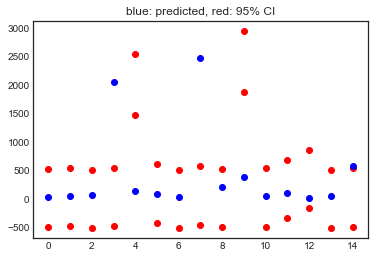

In [417]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm4.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()